In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
# Step 1: Install kaggle
!pip install -q kaggle

# Step 2: Set Kaggle credentials (paste your username & key here)
import os
os.environ['KAGGLE_USERNAME'] = "ashikurrahman2"
os.environ['KAGGLE_KEY'] = "467d3db544d859c777f9e8863cc51ed7"

# Step 3: Download dataset
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition



 86% 700M/814M [00:10<00:02, 46.1MB/s]
100% 814M/814M [00:11<00:00, 77.4MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats-redux-kernels-edition.zip", 'r')
zip_ref.extractall("/content/dogs_vs_cats_data")
zip_ref.close()


In [5]:
import zipfile

# Train unzip
with zipfile.ZipFile("/content/dogs_vs_cats_data/train.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/dogs_vs_cats_data/train")

# Test unzip
with zipfile.ZipFile("/content/dogs_vs_cats_data/test.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/dogs_vs_cats_data/test")


In [17]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout


In [7]:
# Generators

train_ds = keras.utils.image_dataset_from_directory(
    "/content/dogs_vs_cats_data/train",
    labels="inferred",
    label_mode="int",
    image_size=(256, 256),
    batch_size=32
)


validation_ds = keras.utils.image_dataset_from_directory(
    "/content/dogs_vs_cats_data/test",
    labels="inferred",
    label_mode="int",
    image_size=(256, 256),
    batch_size=32
)

Found 25000 files belonging to 1 classes.
Found 12500 files belonging to 1 classes.


In [8]:
# Normalization

def process(image, label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [20]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Input(shape=(256, 256, 3)),
    Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"),

    Conv2D(64, kernel_size=(3,3), padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"),

    Conv2D(128, kernel_size=(3,3), padding="valid", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding="valid"),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.1),
    Dense(64, activation="relu"),
    Dropout(0.1),
    Dense(1, activation="sigmoid")
])


In [21]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [22]:
history = model.fit(train_ds,epochs = 10,validation_data = validation_ds)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 104ms/step - accuracy: 0.9960 - loss: 0.0397 - val_accuracy: 1.0000 - val_loss: 4.7340e-12
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.9999 - loss: 4.1063e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 96ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 1.0000 - loss: 3.3771e-43 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━

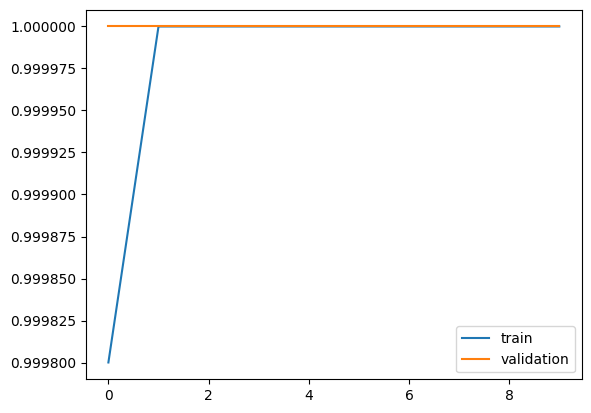

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

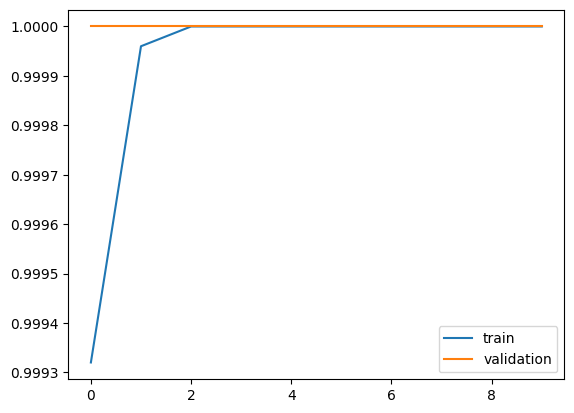

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

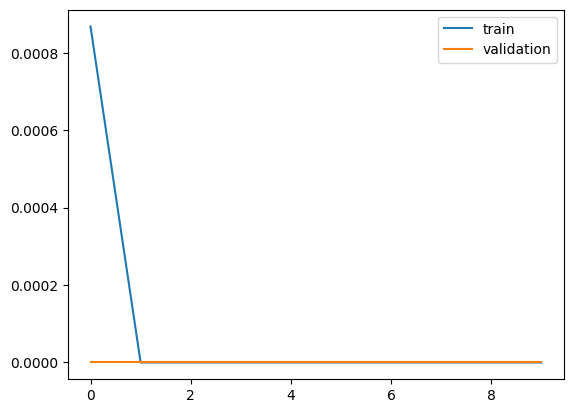

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

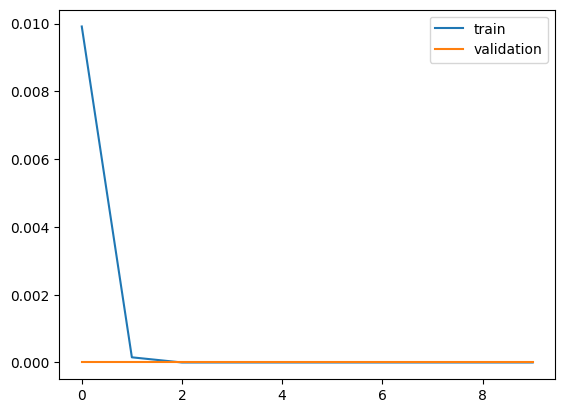

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

# **New Image Predict**

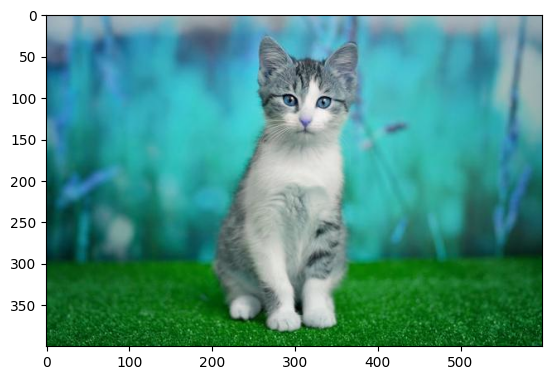

In [25]:
import cv2

test_img = cv2.imread('/content/Cat.jpg')

plt.imshow(test_img)
plt.show()

In [26]:
test_img.shape

(400, 599, 3)

In [29]:
test_img = cv2.resize(test_img,(255,255))


In [32]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
test_input = np.expand_dims(test_img, axis=0)

if test_img.shape[-1] == 1:  # grayscale
    test_img = np.repeat(test_img, 3, axis=-1)

In [33]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.]], dtype=float32)

# **Dog**

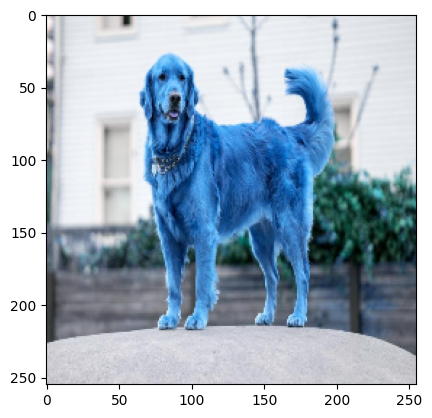

In [39]:
import cv2

test_img2 = cv2.imread('/content/Dog.jpeg')

plt.imshow(test_img)
plt.show()

In [40]:
test_img2.shape

(625, 863, 3)

In [44]:
test_img2 = cv2.resize(test_img2,(255,255))

In [45]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
test_input1 = np.expand_dims(test_img2, axis=0)

if test_img.shape[-1] == 1:  # grayscale
    test_img2 = np.repeat(test_img2, 3, axis=-1)

In [47]:
model.predict(test_input1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[0.]], dtype=float32)